<a href="https://colab.research.google.com/github/DRRguez/DRRguez/blob/main/TI_1_Practica1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practica 1

**Nombre:** Diego Alfredo Rodríguez Rodríguez
**e-mail:** diego.rodriguez1787@alumnos.udg.mx

## MODULES

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
# Add module in order to graphy in 3D from matplotlib
from mpl_toolkits import mplot3d
import pandas as pd

import plotly.graph_objects as go

from scipy.stats import wrapcauchy

## CLASSES

In [36]:
################# http://www.pygame.org/wiki/2DVectorClass ##################
class Vec2d(object):
    """2d vector class, supports vector and scalar operators,
       and also provides a bunch of high level functions
       """
    __slots__ = ['x', 'y']

    def __init__(self, x_or_pair, y = None):
        if y == None:            
            self.x = x_or_pair[0]
            self.y = x_or_pair[1]
        else:
            self.x = x_or_pair
            self.y = y
            
    # Addition
    def __add__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x + other.x, self.y + other.y)
        elif hasattr(other, "__getitem__"):
            return Vec2d(self.x + other[0], self.y + other[1])
        else:
            return Vec2d(self.x + other, self.y + other)

    # Subtraction
    def __sub__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x - other.x, self.y - other.y)
        elif (hasattr(other, "__getitem__")):
            return Vec2d(self.x - other[0], self.y - other[1])
        else:
            return Vec2d(self.x - other, self.y - other)
    
    # Vector length
    def get_length(self):
        return math.sqrt(self.x**2 + self.y**2)
    
    # rotate vector
    def rotated(self, angle):        
        cos = math.cos(angle)
        sin = math.sin(angle)
        x = self.x*cos - self.y*sin
        y = self.x*sin + self.y*cos
        return Vec2d(x, y)

## Ejemplo Brownian Motion 1D

In [ ]:
# Init parameters
s_pos = 0
n_steps = 1000

# Warning about the small number of steps
if n_steps < 30:
    print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")

# Init Brownian Walk vector
bw = np.ones(n_steps)*s_pos

# Generate trajectory
for i in range(1, n_steps):
    # Sampling from a uniform distribution
    di = np.random.choice([1,-1])
    # Wiener process
    bw[i] = bw[i-1]+(di/np.sqrt(n_steps))

## Actividad 1: Brownian Motion 1D - N Trayectoria

* Guardar trayectoria en Numpy array
* Visualizar con *matplotlib*

In [9]:
# init parameters
s_pos=0
n_steps=10000
n_motions=100 # <-Number of Browniang Walks Calculated

# Warning about small number of steps
if n_steps < 30:
    print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")

# Init Brownian Walk vector
bw = np.ones(shape=(n_steps,n_motions))*s_pos

# Generate trajectories
for i in range(1,n_motions):
  for j in range(1, n_steps):
      # Sampling from a uniform distribution
      di = np.random.choice([1,-1])
      # Wiener process
      bw[j,i] = bw[j-1,i]+(di/np.sqrt(n_steps))

<function matplotlib.pyplot.show(*args, **kw)>

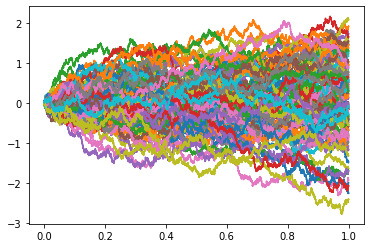

In [10]:
# times aux
times = np.linspace(0,1,n_steps)

# Graph from Pyplot
plt.plot(times,bw)
plt.show

## Actividad 2: Brownian Motion 2D - 1 Trayectoria

* Movimientos: Norte, Sur, Este, Oeste
* Guardar trayectoria en Numpy array
* Visualizar con *matplotlib* - Proyeccion en 2D
* Visualizar con *matplotlib* - Proyeccion en 3D

In [24]:
# init variables
n_steps = 10000
s_pos = 0
speed = 6


# Matriz para Brownian Walker
BM_2d = np.ones(shape=(n_steps,2))*s_pos

for i in range(1, n_steps):
  # First we use a random choice to choose between 3 possibilietes -1 and 1
  # having a probability of 0.25 and 0 having a probability of 0.5 for the
  # x movement
  x_choice = np.random.choice([-1,0,0,1])
  if x_choice==0:
  # Then if in the last step 0 is chosen we proceed to chose between two 
  # possibilites for the y movemente -1 and 1 both having a probability of 0.5
    y_choice = np.random.choice([-1,1])
  else:
    y_choice=0

  BM_2d[i,0]=BM_2d[i-1,0]+x_choice*speed
  BM_2d[i,1]=BM_2d[i-1,1]+y_choice*speed

# When we use the vector class we choose between 4 possibilites having 0.25
# of probability for each one. In the method here presented we share the same
# probabilities having 0.25 for the movement in x and 0.5*0.5=0.25 for the
# movement in y

<function matplotlib.pyplot.show(*args, **kw)>

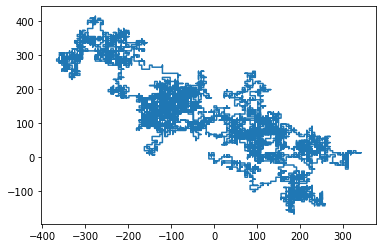

In [25]:
# Plot Brownian 2d trajectory

plt.plot(BM_2d[:,0], BM_2d[:,1])
plt.show

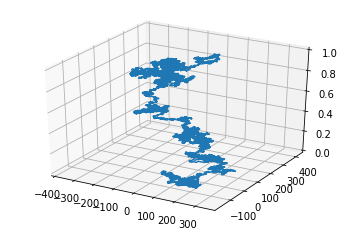

In [29]:
# times aux
times = np.linspace(0,1,n_steps)

# Graph 3d from Pyplot
ax = plt.axes(projection='3d')
ax.plot3D(BM_2d[:,0], BM_2d[:,1],times)

## Actividad 3: Correlated Random Walk - 1 Trayectoria

* Utilizar la clase Vec2d
* Guardar trayectoria en Numpy array
* Visualizar con **plotly**

In [42]:
# initialize cauchy distribution
CRW_exponent = 0.7

# resolution
resolution = 360
aux_domain = np.linspace(0, 2*np.pi, resolution)

# cauchy probability distribution function
wrapcauchy_pdf = np.array([wrapcauchy.pdf(i, CRW_exponent) for i in aux_domain])

# cauchy function normalization
wrapcauchy_pdf = wrapcauchy_pdf/np.sum(wrapcauchy_pdf)

In [43]:
# init variables
n_steps = 10000
s_pos = 0
speed = 6

# init velocity vector
velocity = Vec2d(speed, 0)

# Matrix for CRW
CRW = np.ones(shape=(n_steps,2))*s_pos

for i in range(1, n_steps):
  turn_angle = np.random.choice(aux_domain,p=wrapcauchy_pdf)
  velocity = velocity.rotated(turn_angle)

  CRW[i,0]=CRW[i-1,0]+velocity.x
  CRW[i,1]=CRW[i-1,1]+velocity.y

In [44]:
# Init figure
fig_CRW= go.Figure()

fig_CRW.add_trace(go.Scatter(x= CRW[:,0],
                            y = CRW[:,1],
                            marker = dict(size=2),
                            line = dict(width=2),
                            mode = 'lines',
                            name = ' CRW with cauchy 0.7',
                            showlegend = True
                            ))
fig_CRW.show()

In [45]:
# time aux vector
times = np.linspace(0,1, n_steps)

#init figure
fig_CRW_3d = go.Figure()

#plot trajectory
fig_CRW_3d.add_trace(go.Scatter3d(x= CRW[:,0],
                              y = CRW[:,1],
                              z = times,
                              marker = dict(size=2),
                              line = dict(width=2),
                              mode = 'lines',
                              name = ' CRW_3d',
                              showlegend = True
                               ))

# figure parameters -- update layout
fig_CRW_3d.update_layout(title_text = 'CRW trajectory in 3D',
                        autosize = False,
                        width = 800,
                        height = 800,
                        scene_camera = dict(
                            up=dict(x=0, y=1, z=0),
                            center = dict(x=0, y=0, z=0),
                            eye=dict(x=0,y=0,z=1)),
                        scene = dict(
                            xaxis=dict(title='x_pos (mm)'),
                            yaxis=dict(title='y_pos (mm)'),
                            zaxis=dict(title='time',nticks=20),
                        )
                        )

fig_CRW_3d.show()